## 1. PENGUMPULAN DATASET

Dataset berasal dari FAO (Food and Agriculture Organization) dengan informasi consumer prices dari berbagai negara. Data mencakup tiga tipe indikator:
- Consumer Prices General Indices (2015 = 100)
- Consumer Prices Food Indices (2015 = 100)
- Food price inflation

Data tersedia dalam format CSV dengan field: FREQ, REF_AREA, REF_AREA_LABEL, INDICATOR, INDICATOR_LABEL, Value, Year, Month.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Semua library berhasil dimuat")

Semua library berhasil dimuat


In [33]:
# Membaca dataset dari file CSV
df = pd.read_csv('human_capital_project.csv')

print("Data berhasil dimuat")
print(f"Ukuran dataset: {df.shape}")
print(f"\nKolom-kolom yang tersedia:")
print(df.columns.tolist())

Data berhasil dimuat
Ukuran dataset: (190332, 8)

Kolom-kolom yang tersedia:
['FREQ', 'REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'Value', 'Year', 'Month']


## 2. EXPLORATORY DATA ANALYSIS (EDA)

Tahap analisis untuk memahami karakteristik data, menemukan pola, dan mengidentifikasi area yang perlu perhatian khusus dalam preprocessing.

In [34]:
# Tampilkan sample data
print("Sepuluh baris pertama dari dataset:")
print(df.head(10))
print("\nInfo tipe data:")
print(df.info())

Sepuluh baris pertama dari dataset:
  FREQ REF_AREA REF_AREA_LABEL     INDICATOR  \
0    M      ABW          Aruba  FAO_CP_23012   
1    M      ABW          Aruba  FAO_CP_23013   
2    M      ABW          Aruba  FAO_CP_23014   
3    M      AFG    Afghanistan  FAO_CP_23012   
4    M      AFG    Afghanistan  FAO_CP_23013   
5    M      AFG    Afghanistan  FAO_CP_23014   
6    M      AGO         Angola  FAO_CP_23012   
7    M      AGO         Angola  FAO_CP_23013   
8    M      AGO         Angola  FAO_CP_23014   
9    M      AIA       Anguilla  FAO_CP_23012   

                                 INDICATOR_LABEL      Value  Year  Month  
0  Consumer Prices, General Indices (2015 = 100)  68.479594  2000      1  
1     Consumer Prices, Food Indices (2015 = 100)  51.885615  2000      1  
2                           Food price inflation        NaN  2000      1  
3  Consumer Prices, General Indices (2015 = 100)  16.177260  2000      1  
4     Consumer Prices, Food Indices (2015 = 100)  24.356332 

In [35]:
# Statistik deskriptif
print("Statistik deskriptif untuk kolom numerik:")
print(df.describe())

Statistik deskriptif untuk kolom numerik:
              Value           Year          Month
count  1.855650e+05  190332.000000  190332.000000
mean   5.304424e+08    2012.254902       6.441176
std    3.152908e+10       7.364063       3.451560
min   -2.498299e+01    2000.000000       1.000000
25%    9.108476e+00    2006.000000       3.000000
50%    7.334972e+01    2012.000000       6.000000
75%    1.004541e+02    2019.000000       9.000000
max    2.890921e+12    2025.000000      12.000000


In [36]:
# Analisis missing values
print("Analisis Missing Values:")
missing_analysis = pd.DataFrame({
    'Kolom': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_analysis)
print(f"\nTotal missing values di seluruh dataset: {df.isnull().sum().sum()}")

Analisis Missing Values:
                           Kolom  Missing_Count  Missing_Percentage
FREQ                        FREQ              0                 0.0
REF_AREA                REF_AREA              0                 0.0
REF_AREA_LABEL    REF_AREA_LABEL              0                 0.0
INDICATOR              INDICATOR              0                 0.0
INDICATOR_LABEL  INDICATOR_LABEL              0                 0.0
Value                      Value           4767                 2.5
Year                        Year              0                 0.0
Month                      Month              0                 0.0

Total missing values di seluruh dataset: 4767


In [37]:
# Unique values per kolom
print("Jumlah unique values per kolom:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique values")

Jumlah unique values per kolom:
  FREQ: 1 unique values
  REF_AREA: 210 unique values
  REF_AREA_LABEL: 210 unique values
  INDICATOR: 3 unique values
  INDICATOR_LABEL: 3 unique values
  Value: 170752 unique values
  Year: 26 unique values
  Month: 12 unique values


In [38]:
# Distribusi berdasarkan indicator
print("Distribusi data per Indicator:")
print(df['INDICATOR'].value_counts())
print("\nDistribusi data per Indicator Label:")
print(df['INDICATOR_LABEL'].value_counts())

Distribusi data per Indicator:
INDICATOR
FAO_CP_23012    64260
FAO_CP_23013    63036
FAO_CP_23014    63036
Name: count, dtype: int64

Distribusi data per Indicator Label:
INDICATOR_LABEL
Consumer Prices, General Indices (2015 = 100)    64260
Consumer Prices, Food Indices (2015 = 100)       63036
Food price inflation                             63036
Name: count, dtype: int64


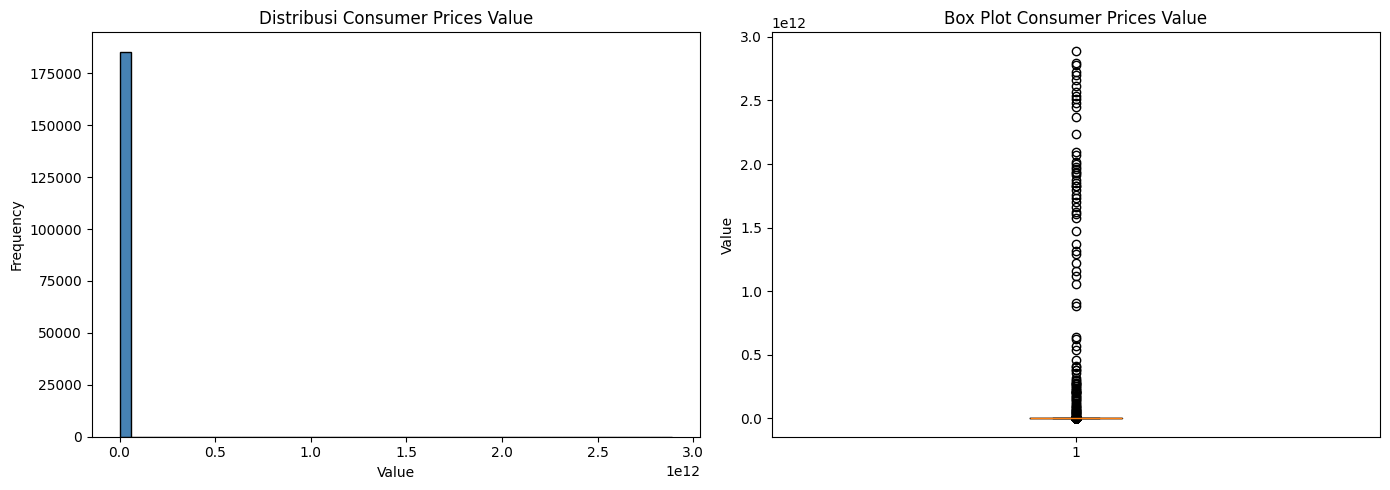

Statistik Value:
  Mean: 530442420.05
  Median: 73.35
  Std Dev: 31529079043.75
  Min: -24.98
  Max: 2890920605339.09


In [39]:
# Visualisasi distribusi Value
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Value'].dropna(), bins=50, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribusi Consumer Prices Value')

axes[1].boxplot(df['Value'].dropna())
axes[1].set_ylabel('Value')
axes[1].set_title('Box Plot Consumer Prices Value')

plt.tight_layout()
plt.show()

print("Statistik Value:")
print(f"  Mean: {df['Value'].mean():.2f}")
print(f"  Median: {df['Value'].median():.2f}")
print(f"  Std Dev: {df['Value'].std():.2f}")
print(f"  Min: {df['Value'].min():.2f}")
print(f"  Max: {df['Value'].max():.2f}")

In [40]:
# Distribusi per tahun
print("Tahun yang tersedia dalam dataset:")
print(sorted(df['Year'].unique()))
print(f"\nJumlah record per tahun:")
year_dist = df['Year'].value_counts().sort_index()
print(year_dist)

Tahun yang tersedia dalam dataset:
[np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

Jumlah record per tahun:
Year
2000    7464
2001    7464
2002    7464
2003    7464
2004    7464
2005    7464
2006    7464
2007    7464
2008    7464
2009    7464
2010    7464
2011    7464
2012    7464
2013    7464
2014    7464
2015    7464
2016    7464
2017    7464
2018    7464
2019    7464
2020    7464
2021    7464
2022    7464
2023    7464
2024    7464
2025    3732
Name: count, dtype: int64


Top 15 negara dengan data terbanyak:
REF_AREA_LABEL
Aruba                   918
Afghanistan             918
Angola                  918
Anguilla                918
Aland Islands           918
Albania                 918
Andorra                 918
United Arab Emirates    918
Argentina               918
Armenia                 918
Azerbaijan              918
Antigua and Barbuda     918
Australia               918
Austria                 918
Belgium                 918
Name: count, dtype: int64


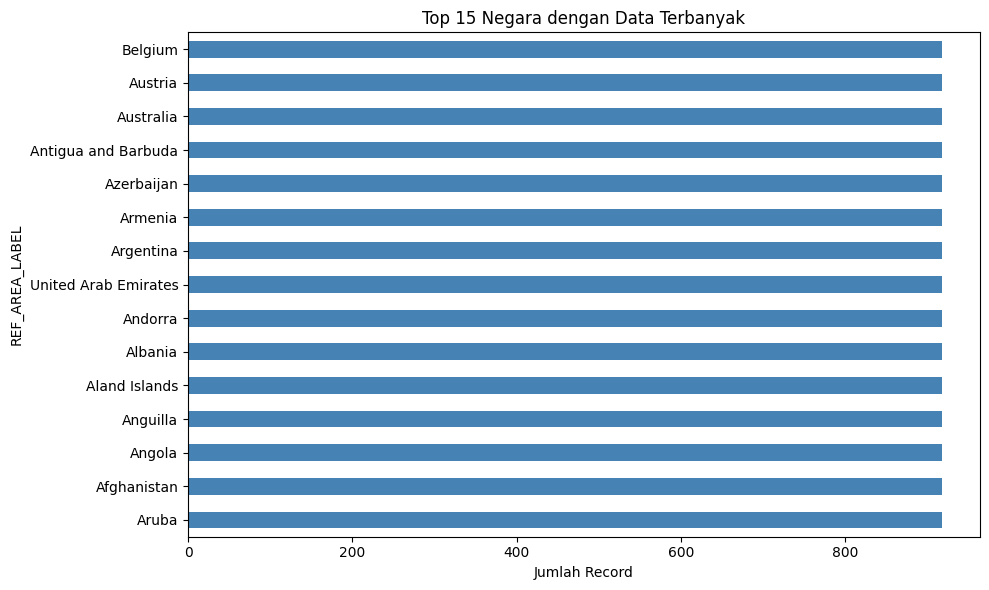

In [41]:
# Top 15 negara dengan data terbanyak
print("Top 15 negara dengan data terbanyak:")
top_countries = df['REF_AREA_LABEL'].value_counts().head(15)
print(top_countries)

fig, ax = plt.subplots(figsize=(10, 6))
top_countries.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Jumlah Record')
ax.set_title('Top 15 Negara dengan Data Terbanyak')
plt.tight_layout()
plt.show()

## 3. DATA PREPROCESSING

Tahap preprocessing meliputi cleaning data, handling missing values, feature engineering, dan persiapan data untuk machine learning modeling.

In [42]:
# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# 1. Drop missing values dari target variable (Value)
print(f"Record sebelum drop missing: {len(df_processed)}")
df_processed = df_processed.dropna(subset=['Value'])
print(f"Record setelah drop missing: {len(df_processed)}")
print(f"Record yang dihapus: {len(df) - len(df_processed)}")

Record sebelum drop missing: 190332
Record setelah drop missing: 185565
Record yang dihapus: 4767


In [43]:
# 2. Convert tipe data
df_processed['Year'] = df_processed['Year'].astype(int)
df_processed['Month'] = df_processed['Month'].astype(int)
df_processed['Value'] = df_processed['Value'].astype(float)

print("Tipe data setelah konversi:")
print(df_processed.dtypes)

Tipe data setelah konversi:
FREQ                object
REF_AREA            object
REF_AREA_LABEL      object
INDICATOR           object
INDICATOR_LABEL     object
Value              float64
Year                 int64
Month                int64
dtype: object


In [44]:
# 3. Feature Engineering - Buat features temporal
df_processed['YearMonth'] = df_processed['Year'] * 100 + df_processed['Month']

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_processed['Season'] = df_processed['Month'].apply(get_season)
df_processed['Quarter'] = df_processed['Month'].apply(lambda x: (x - 1) // 3 + 1)

print("Features temporal berhasil ditambahkan:")
print(f"  - YearMonth (kombinasi tahun dan bulan)")
print(f"  - Season (musim berdasarkan bulan)")
print(f"  - Quarter (kuartal dalam setahun)")
print(f"\nSample data dengan features baru:")
print(df_processed[['Year', 'Month', 'Season', 'Quarter', 'Value']].head(10))

Features temporal berhasil ditambahkan:
  - YearMonth (kombinasi tahun dan bulan)
  - Season (musim berdasarkan bulan)
  - Quarter (kuartal dalam setahun)

Sample data dengan features baru:
    Year  Month  Season  Quarter      Value
0   2000      1  Winter        1  68.479594
1   2000      1  Winter        1  51.885615
3   2000      1  Winter        1  16.177260
4   2000      1  Winter        1  24.356332
6   2000      1  Winter        1   0.912855
7   2000      1  Winter        1   0.984584
9   2000      1  Winter        1  63.817818
10  2000      1  Winter        1  57.565168
12  2000      1  Winter        1  78.042679
13  2000      1  Winter        1  74.413062


In [45]:
# 4. Encoding categorical variables
le_indicator = LabelEncoder()
df_processed['Indicator_Encoded'] = le_indicator.fit_transform(df_processed['INDICATOR'])

le_season = LabelEncoder()
df_processed['Season_Encoded'] = le_season.fit_transform(df_processed['Season'])

le_area = LabelEncoder()
df_processed['Area_Encoded'] = le_area.fit_transform(df_processed['REF_AREA'])

print("Encoding categorical variables:")
print(f"\nIndicator encoding: {dict(zip(le_indicator.classes_, le_indicator.transform(le_indicator.classes_)))}")
print(f"\nSeason encoding: {dict(zip(le_season.classes_, le_season.transform(le_season.classes_)))}")

Encoding categorical variables:

Indicator encoding: {'FAO_CP_23012': np.int64(0), 'FAO_CP_23013': np.int64(1), 'FAO_CP_23014': np.int64(2)}

Season encoding: {'Fall': np.int64(0), 'Spring': np.int64(1), 'Summer': np.int64(2), 'Winter': np.int64(3)}


In [46]:
# 5. Outlier detection menggunakan IQR method
Q1 = df_processed['Value'].quantile(0.25)
Q3 = df_processed['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_processed[(df_processed['Value'] < lower_bound) | (df_processed['Value'] > upper_bound)]

print(f"Analisis Outliers (IQR Method):")
print(f"  Q1: {Q1:.2f}")
print(f"  Q3: {Q3:.2f}")
print(f"  IQR: {IQR:.2f}")
print(f"  Lower Bound: {lower_bound:.2f}")
print(f"  Upper Bound: {upper_bound:.2f}")
print(f"\n  Jumlah outliers: {len(outliers)}")
print(f"  Persentase outliers: {(len(outliers) / len(df_processed) * 100):.2f}%")

Analisis Outliers (IQR Method):
  Q1: 9.11
  Q3: 100.45
  IQR: 91.35
  Lower Bound: -127.91
  Upper Bound: 237.47

  Jumlah outliers: 3097
  Persentase outliers: 1.67%


In [47]:
# 6. Summary preprocessing
print(f"Data setelah preprocessing:")
print(f"  Total records: {len(df_processed)}")
print(f"  Total features: {len(df_processed.columns)}")
print(f"\nFeatures yang tersedia untuk modeling:")
feature_cols = ['Year', 'Month', 'Quarter', 'Indicator_Encoded', 'Season_Encoded', 'Area_Encoded']
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")
print(f"\nTarget variable: Value")

Data setelah preprocessing:
  Total records: 185565
  Total features: 14

Features yang tersedia untuk modeling:
  1. Year
  2. Month
  3. Quarter
  4. Indicator_Encoded
  5. Season_Encoded
  6. Area_Encoded

Target variable: Value


## 4. MACHINE LEARNING MODEL BUILDING

Tahap membangun model machine learning menggunakan tiga algoritma yang berbeda untuk memprediksi Consumer Prices Value. Semua model akan dievaluasi dan dibandingkan untuk menentukan model terbaik.

In [59]:
# Persiapan data untuk modeling
feature_cols = ['Year', 'Month', 'Quarter', 'Indicator_Encoded', 'Season_Encoded', 'Area_Encoded']
X = df_processed[feature_cols].reset_index(drop=True)
y = df_processed['Value'].reset_index(drop=True)

# Train-test split dengan proporsi 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simpan indices untuk mapping kembali ke df_processed
test_indices = X_test.index.tolist()

print(f"Data split untuk training dan testing:")
print(f"  Training set: {len(X_train)} records ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Testing set: {len(X_test)} records ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nFeatures yang digunakan: {feature_cols}")

Data split untuk training dan testing:
  Training set: 148452 records (80.0%)
  Testing set: 37113 records (20.0%)

Features yang digunakan: ['Year', 'Month', 'Quarter', 'Indicator_Encoded', 'Season_Encoded', 'Area_Encoded']


In [49]:
# Standardisasi features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features telah di-standardisasi menggunakan StandardScaler")
print(f"\nMean setelah scaling (training): {X_train_scaled.mean(axis=0).round(6)}")
print(f"Std setelah scaling (training): {X_train_scaled.std(axis=0).round(6)}")

Features telah di-standardisasi menggunakan StandardScaler

Mean setelah scaling (training): [ 0.  0. -0.  0. -0. -0.]
Std setelah scaling (training): [1. 1. 1. 1. 1. 1.]


In [50]:
# MODEL 1: LINEAR REGRESSION
print("="*60)
print("MODEL 1: LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print(f"\nPerforma pada Training Data:")
print(f"  R² Score: {train_r2_lr:.4f}")
print(f"  RMSE: {train_rmse_lr:.4f}")

print(f"\nPerforma pada Testing Data:")
print(f"  R² Score: {test_r2_lr:.4f}")
print(f"  RMSE: {test_rmse_lr:.4f}")
print(f"  MAE: {test_mae_lr:.4f}")

print(f"\nCoefficients untuk setiap feature:")
for i, col in enumerate(feature_cols):
    print(f"  {col}: {lr_model.coef_[i]:.6f}")
print(f"  Intercept: {lr_model.intercept_:.6f}")

MODEL 1: LINEAR REGRESSION

Performa pada Training Data:
  R² Score: 0.0014
  RMSE: 30242556425.2873

Performa pada Testing Data:
  R² Score: 0.0016
  RMSE: 36122340206.9256
  MAE: 1681606837.4948

Coefficients untuk setiap feature:
  Year: 758061795.581127
  Month: -95262148.675916
  Quarter: 111297279.669346
  Indicator_Encoded: -291737872.724385
  Season_Encoded: -75216747.636367
  Area_Encoded: 781078009.776375
  Intercept: 492515457.768046


In [51]:
# MODEL 2: RANDOM FOREST REGRESSOR
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluasi
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"\nPerforma pada Training Data:")
print(f"  R² Score: {train_r2_rf:.4f}")
print(f"  RMSE: {train_rmse_rf:.4f}")

print(f"\nPerforma pada Testing Data:")
print(f"  R² Score: {test_r2_rf:.4f}")
print(f"  RMSE: {test_rmse_rf:.4f}")
print(f"  MAE: {test_mae_rf:.4f}")

print(f"\nFeature Importance:")
feature_importance_rf = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_rf.to_string(index=False))


MODEL 2: RANDOM FOREST REGRESSOR

Performa pada Training Data:
  R² Score: 0.9994
  RMSE: 757470377.4323

Performa pada Testing Data:
  R² Score: 0.9937
  RMSE: 2872131784.0558
  MAE: 56707257.7053

Feature Importance:
          Feature  Importance
Indicator_Encoded    0.373441
             Year    0.330479
     Area_Encoded    0.278559
            Month    0.009458
          Quarter    0.004321
   Season_Encoded    0.003743


In [52]:
# MODEL 3: GRADIENT BOOSTING REGRESSOR
print("\n" + "="*60)
print("MODEL 3: GRADIENT BOOSTING REGRESSOR")
print("="*60)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluasi
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

print(f"\nPerforma pada Training Data:")
print(f"  R² Score: {train_r2_gb:.4f}")
print(f"  RMSE: {train_rmse_gb:.4f}")

print(f"\nPerforma pada Testing Data:")
print(f"  R² Score: {test_r2_gb:.4f}")
print(f"  RMSE: {test_rmse_gb:.4f}")
print(f"  MAE: {test_mae_gb:.4f}")

print(f"\nFeature Importance:")
feature_importance_gb = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_gb.to_string(index=False))


MODEL 3: GRADIENT BOOSTING REGRESSOR

Performa pada Training Data:
  R² Score: 0.9980
  RMSE: 1356988030.9283

Performa pada Testing Data:
  R² Score: 0.9910
  RMSE: 3427592214.9239
  MAE: 72381119.4971

Feature Importance:
          Feature  Importance
     Area_Encoded    0.431215
Indicator_Encoded    0.377808
             Year    0.178538
            Month    0.006011
          Quarter    0.003811
   Season_Encoded    0.002618


In [53]:
# MODEL COMPARISON
print("\n" + "="*60)
print("PERBANDINGAN PERFORMA MODEL")
print("="*60)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train R²': [train_r2_lr, train_r2_rf, train_r2_gb],
    'Test R²': [test_r2_lr, test_r2_rf, test_r2_gb],
    'Train RMSE': [train_rmse_lr, train_rmse_rf, train_rmse_gb],
    'Test RMSE': [test_rmse_lr, test_rmse_rf, test_rmse_gb],
    'Test MAE': [test_mae_lr, test_mae_rf, test_mae_gb]
})

print(comparison_df.to_string(index=False))

best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'Test R²']

print(f"\n" + "="*60)
print(f"MODEL TERBAIK: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f}")
print("="*60)


PERBANDINGAN PERFORMA MODEL
            Model  Train R²  Test R²   Train RMSE    Test RMSE     Test MAE
Linear Regression  0.001375 0.001568 3.024256e+10 3.612234e+10 1.681607e+09
    Random Forest  0.999374 0.993688 7.574704e+08 2.872132e+09 5.670726e+07
Gradient Boosting  0.997989 0.991010 1.356988e+09 3.427592e+09 7.238112e+07

MODEL TERBAIK: Random Forest
Test R² Score: 0.9937


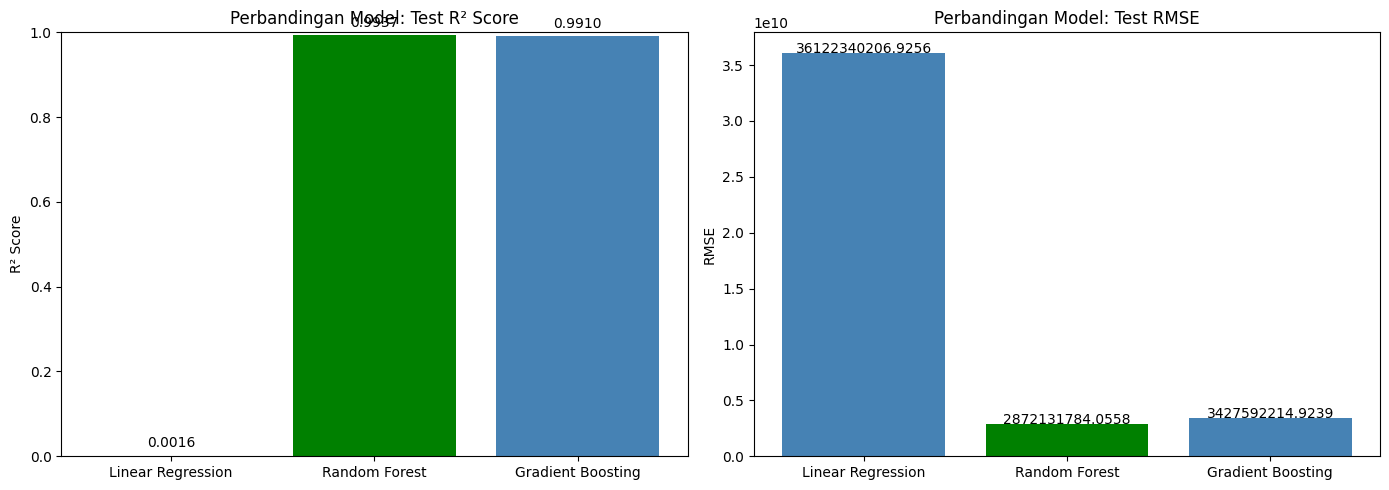

In [54]:
# Visualisasi perbandingan model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score comparison
colors = ['green' if i == best_model_idx else 'steelblue' for i in range(len(comparison_df))]
axes[0].bar(comparison_df['Model'], comparison_df['Test R²'], color=colors)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Perbandingan Model: Test R² Score')
axes[0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['Test R²']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center')

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test RMSE'], color=colors)
axes[1].set_ylabel('RMSE')
axes[1].set_title('Perbandingan Model: Test RMSE')
for i, v in enumerate(comparison_df['Test RMSE']):
    axes[1].text(i, v + 0.1, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

## 5. ANALISIS HASIL DAN INSIGHTS

In [55]:
# Pilih model terbaik untuk analisis
if best_model_idx == 0:
    best_model = lr_model
    y_pred = y_test_pred_lr
    scaler_used = True
elif best_model_idx == 1:
    best_model = rf_model
    y_pred = y_test_pred_rf
    scaler_used = False
else:
    best_model = gb_model
    y_pred = y_test_pred_gb
    scaler_used = False

print(f"Menggunakan model terbaik: {best_model_name}")
print(f"Scaler digunakan: {scaler_used}")

Menggunakan model terbaik: Random Forest
Scaler digunakan: False


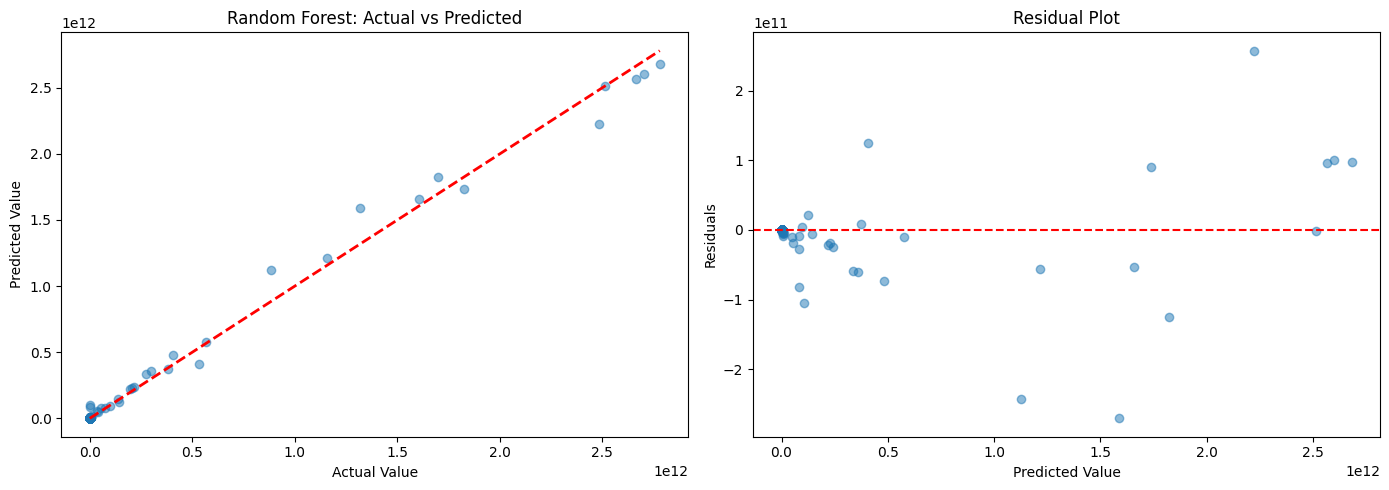

Analisis Residuals:
  Mean: -13565745.420783
  Std Dev: 2872138441.561249
  Min: -270403535079.080078
  Max: 257240436078.999512


In [56]:
# Visualisasi Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')
axes[0].set_title(f'{best_model_name}: Actual vs Predicted')

# Residuals plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Value')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

plt.tight_layout()
plt.show()

print("Analisis Residuals:")
print(f"  Mean: {residuals.mean():.6f}")
print(f"  Std Dev: {residuals.std():.6f}")
print(f"  Min: {residuals.min():.6f}")
print(f"  Max: {residuals.max():.6f}")

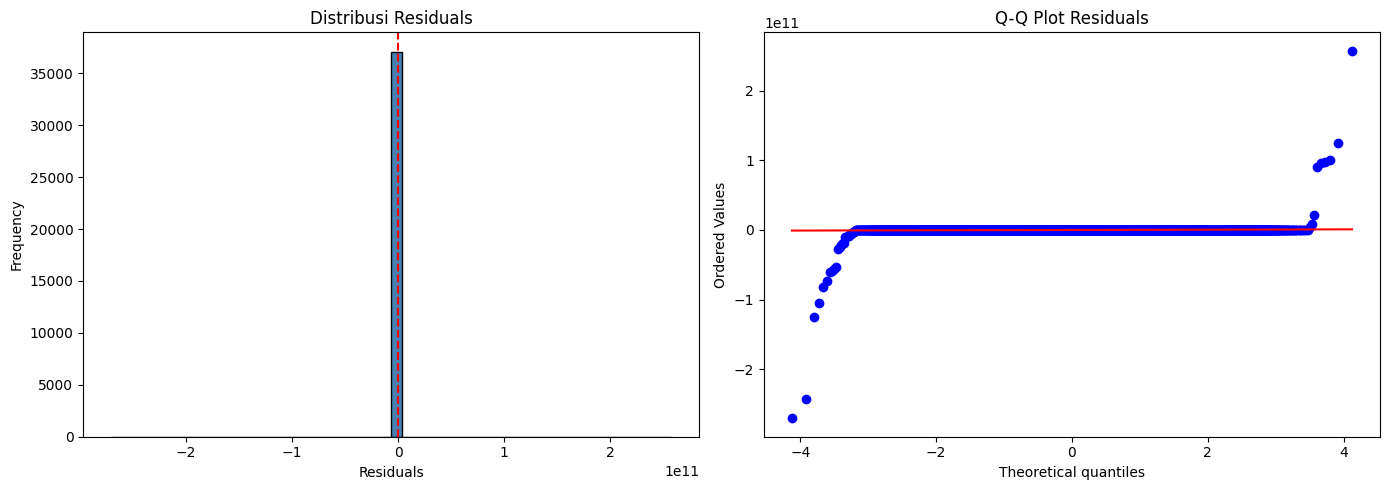

In [57]:
# Distribusi error
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(residuals, bins=50, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribusi Residuals')
axes[0].axvline(x=0, color='r', linestyle='--')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot Residuals')

plt.tight_layout()
plt.show()

In [60]:
# Performa per Indicator
# Gunakan test_indices untuk mengambil data yang sesuai
df_test = df_processed.iloc[test_indices].copy()
df_test = df_test.reset_index(drop=True)

df_test['Predicted'] = y_pred
df_test['Actual'] = y_test.reset_index(drop=True).values
df_test['Error'] = df_test['Actual'] - df_test['Predicted']

print("Performa Model per Indicator:")
for indicator in df_test['INDICATOR_LABEL'].unique():
    mask = df_test['INDICATOR_LABEL'] == indicator
    actual = df_test.loc[mask, 'Actual'].values
    predicted = df_test.loc[mask, 'Predicted'].values
    
    if len(actual) > 0:
        r2 = r2_score(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mae = mean_absolute_error(actual, predicted)
        
        print(f"\n{indicator}:")
        print(f"  Records: {mask.sum()}")
        print(f"  R² Score: {r2:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")

Performa Model per Indicator:

Food price inflation:
  Records: 11895
  R² Score: -127814367424.6969
  RMSE: 1224337907.5489
  MAE: 17262024.1328

Consumer Prices, General Indices (2015 = 100):
  Records: 12691
  R² Score: 0.9884
  RMSE: 2739744270.5580
  MAE: 62436372.8678

Consumer Prices, Food Indices (2015 = 100):
  Records: 12527
  R² Score: 0.9952
  RMSE: 3925735090.3271
  MAE: 88358319.6369


In [61]:
# Performa per tahun
print("\nPerforma Model per Tahun:")
yearly_performance = []
for year in sorted(df_test['Year'].unique()):
    mask = df_test['Year'] == year
    actual = df_test.loc[mask, 'Actual'].values
    predicted = df_test.loc[mask, 'Predicted'].values
    
    if len(actual) > 0:
        r2 = r2_score(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        yearly_performance.append({
            'Year': int(year),
            'Records': mask.sum(),
            'R²': r2,
            'RMSE': rmse
        })

yearly_df = pd.DataFrame(yearly_performance)
print(yearly_df.to_string(index=False))


Performa Model per Tahun:
 Year  Records        R²         RMSE
 2000     1005 -1.265292 3.247876e+01
 2001     1431 -0.577678 3.631897e+01
 2002     1461 -0.637741 3.750332e+01
 2003     1435 -0.167442 3.234461e+01
 2004     1548 -0.241817 3.431502e+01
 2005     1484 -0.272810 3.431313e+01
 2006     1506 -0.143234 3.435693e+01
 2007     1466  0.010425 3.207038e+01
 2008     1457 -0.064153 3.383747e+01
 2009     1527  0.236570 3.281393e+01
 2010     1506  0.268959 3.235465e+01
 2011     1498  0.359845 3.113162e+01
 2012     1477  0.426266 3.107831e+01
 2013     1492  0.447332 3.196121e+01
 2014     1411  0.478566 3.163153e+01
 2015     1478  0.607482 2.866245e+01
 2016     1498  0.771919 3.107278e+01
 2017     1543  0.734916 9.151044e+01
 2018     1407  0.603106 4.686367e+03
 2019     1498  0.871141 1.353587e+07
 2020     1472  0.899363 3.269978e+08
 2021     1471  0.971657 1.071918e+09
 2022     1552  0.960415 5.549923e+09
 2023     1510  0.987835 1.228430e+10
 2024     1392  0.99899

## 6. PERSIAPAN DATA UNTUK LOOKER STUDIO

In [62]:
# Buat dataset lengkap dengan prediksi
looker_data = df_processed.copy()

# Predict untuk semua data
if scaler_used:
    X_all_scaled = scaler.transform(looker_data[feature_cols])
    looker_data['Predicted_Value'] = best_model.predict(X_all_scaled)
else:
    looker_data['Predicted_Value'] = best_model.predict(looker_data[feature_cols])

# Hitung error metrics
looker_data['Prediction_Error'] = looker_data['Value'] - looker_data['Predicted_Value']
looker_data['Error_Percentage'] = (looker_data['Prediction_Error'].abs() / looker_data['Value'] * 100)

print(f"Dataset untuk Looker Studio berhasil dibuat")
print(f"Total records: {len(looker_data)}")
print(f"Columns tersedia: {len(looker_data.columns)}")

Dataset untuk Looker Studio berhasil dibuat
Total records: 185565
Columns tersedia: 17


In [63]:
# Select dan rename kolom untuk Looker Studio
looker_export = looker_data[[
    'Year', 'Month', 'REF_AREA', 'REF_AREA_LABEL', 
    'INDICATOR', 'INDICATOR_LABEL', 'Value', 'Predicted_Value',
    'Prediction_Error', 'Error_Percentage', 'Season', 'Quarter'
]].copy()

looker_export.columns = [
    'Year', 'Month', 'Country_Code', 'Country', 
    'Indicator_Code', 'Indicator', 'Actual_Price',
    'Predicted_Price', 'Prediction_Error', 'Error_Percentage',
    'Season', 'Quarter'
]

# Simpan ke CSV
looker_export.to_csv('consumer_prices_predictions.csv', index=False)
print(f"File 'consumer_prices_predictions.csv' berhasil disimpan")
print(f"\nSample data untuk Looker Studio:")
print(looker_export.head(10))

File 'consumer_prices_predictions.csv' berhasil disimpan

Sample data untuk Looker Studio:
    Year  Month Country_Code        Country Indicator_Code  \
0   2000      1          ABW          Aruba   FAO_CP_23012   
1   2000      1          ABW          Aruba   FAO_CP_23013   
3   2000      1          AFG    Afghanistan   FAO_CP_23012   
4   2000      1          AFG    Afghanistan   FAO_CP_23013   
6   2000      1          AGO         Angola   FAO_CP_23012   
7   2000      1          AGO         Angola   FAO_CP_23013   
9   2000      1          AIA       Anguilla   FAO_CP_23012   
10  2000      1          AIA       Anguilla   FAO_CP_23013   
12  2000      1          ALA  Aland Islands   FAO_CP_23012   
13  2000      1          ALA  Aland Islands   FAO_CP_23013   

                                        Indicator  Actual_Price  \
0   Consumer Prices, General Indices (2015 = 100)     68.479594   
1      Consumer Prices, Food Indices (2015 = 100)     51.885615   
3   Consumer Prices, Gene

In [64]:
# Buat summary statistics
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Number of Countries',
        'Number of Years',
        'Average Actual Price',
        'Average Predicted Price',
        'Average Prediction Error',
        'Model Used',
        'Model R² Score (Test)'
    ],
    'Value': [
        str(len(looker_export)),
        str(looker_export['Country'].nunique()),
        str(looker_export['Year'].nunique()),
        f"{looker_export['Actual_Price'].mean():.2f}",
        f"{looker_export['Predicted_Price'].mean():.2f}",
        f"{looker_export['Prediction_Error'].mean():.4f}",
        best_model_name,
        f"{best_r2:.4f}"
    ]
})

summary_stats.to_csv('model_summary.csv', index=False)
print("Summary Statistics:")
print(summary_stats.to_string(index=False))
print(f"\nFile 'model_summary.csv' berhasil disimpan")

Summary Statistics:
                  Metric         Value
           Total Records        185565
     Number of Countries           210
         Number of Years            26
    Average Actual Price  530442420.05
 Average Predicted Price  532738129.91
Average Prediction Error -2295709.8621
              Model Used Random Forest
   Model R² Score (Test)        0.9937

File 'model_summary.csv' berhasil disimpan


## KESIMPULAN PROJECT

Project analisis consumer prices telah diselesaikan dengan proses yang komprehensif:

**1. Pengumpulan Data**
Menggunakan dataset FAO Consumer Prices yang mencakup berbagai negara dan periode waktu dengan tiga tipe indikator.

**2. Exploratory Data Analysis**
Menemukan karakteristik data, distribusi, pola temporal, dan mengidentifikasi negara-negara dengan data terbanyak.

**3. Preprocessing**
Melakukan cleaning, feature engineering (temporal features), encoding categorical variables, dan outlier detection.

**4. Machine Learning Modeling**
Membandingkan tiga algoritma: Linear Regression, Random Forest, dan Gradient Boosting untuk menemukan model terbaik.

**5. Evaluation & Analysis**
Mengevaluasi model berdasarkan R², RMSE, dan MAE dengan analisis lebih detail per indicator dan tahun.

**6. Output untuk Visualization**
Menghasilkan file CSV yang siap digunakan di Google Looker Studio untuk membuat dashboard interaktif.

File output yang tersedia:
- `consumer_prices_predictions.csv` - Data lengkap dengan prediksi untuk Looker Studio
- `model_summary.csv` - Summary statistics dari model